<h1>Аналіз та обробка БМД</h1>
<h2>БС-82</h2>
<h3 style="font-family:sans-serif;">Микита Любшин<h3>
  <link rel ="stylesheet" href="style.css"></link>
    <h4>Робота 8</h4>

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<h4>
0. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані повинні відповідати вимогам</h4>

Дані - два гравці у ДнД зустрічають дуже сильного монстра. На протязі 10 ходів кожен гравець атакує мостра з двуручним мечем та гарантовано попадає, наносячи стільки очків пошкоджень, скільки випаде на кубі з 12-ма гранями. Гравці мають однакові статистики, що впливають на попадання та пошкодження. Гравці чесно та відкрито показують свої результати.

In [118]:
import random as r

df = pd.DataFrame(
    {
        "First Player": np.sort(np.random.randint(1,12, size=10)), # discrete uniform
        "Second Player": np.sort(np.random.randint(1,12, size=10)) # discrete uniform
    }
)
df


,First Player,Second Player
0,4,1
1,4,3
2,5,5
3,6,6
4,7,6
5,8,8
6,8,8
7,9,9
8,10,11
9,11,11


<h4>1. Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).</h4>

In [119]:
data_chunk = pd.DataFrame({},index=["середні","стандартні відхилення"])

for i in range(len(df.columns)):
    data_chunk[f"Гравець - {i+1}"] = [np.mean(df.iloc[:,i]),np.std(df.iloc[:,i])]
    
data_ch

,Гравець -1,Гравець -2
середні,6.500000,4.500000
стандартні відхилення,3.640055,3.667424


<h4>2.Побудувати графік розкиду в групах.</h4>

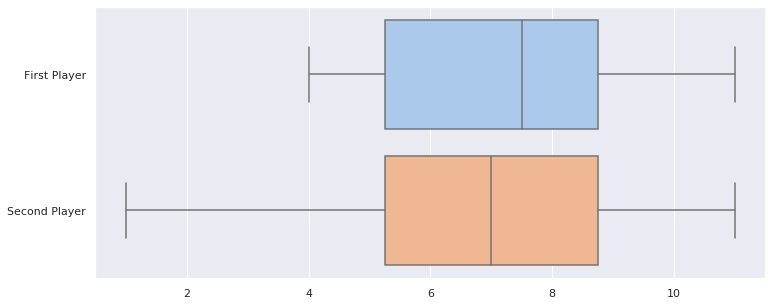

In [120]:
f, ax = plt.subplots(figsize=(12, 5))
f = sns.boxplot(orient = "h",data = df, palette="pastel")

<h4>
3.Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.</h4>

In [147]:
def anova(data = df):
    size = len(data.columns)
    len_d = len(data)
    space = [""]*size
    full_space = [""]*(size + 1)
    
    show_table = pd.DataFrame({})
    
    for i in range(size):
        show_table["Гравець - " +str(i+1)] = []

    show_table["Загальне значення"] = []
    
    show_table.loc["Tc"] = [sum(data.iloc[:,i]) for i in range(size)] + [0] 
    show_table.iloc[0,size] = sum(show_table.iloc[0,:])
    
    show_table.loc["(Tc)^2 "] = [show_table.iloc[0,i]**2 for i in range(size)] + [0] 
    show_table.iloc[1,size] = sum(show_table.iloc[1,:])
    
    show_table.loc["Кількість умов"] = full_space
    show_table.iloc[2,size] = size
    
    show_table.loc["Кількість досліджень"] = [len_d]*size + [len_d*size]
    
    show_table.loc["Квадрат суми"] = space + [show_table.iloc[0,size]**2]
    
    show_table.loc["Константа"] = space + [show_table.iloc[4,size]/show_table.iloc[3,size]]
    
    show_table.loc["Сума квадратів"] = [sum(data.iloc[:,i]**2) for i in range(size)] + [0]
    show_table.iloc[6,size] = sum(show_table.iloc[6,:])
    
    show_table.loc["(1). SSфакт (Внутр. дисперсія)"] = space + [show_table.iloc[1,size]/len_d - show_table.iloc[5,size]]
    show_table.loc["(2). SSзаг  (Загал. дисперсія)"] = space + [show_table.iloc[6,size] - show_table.iloc[5,size]]
    show_table.loc["(3). SSвип  (випадк. величина)"] = space + [show_table.iloc[8,size] - show_table.iloc[7,size]]
    show_table.loc["(4). d факт (Ступені свободи)"] = space + [show_table.iloc[2,size]-1]
    show_table.loc["(4). d  заг (Ступені свободи)"] = space + [show_table.iloc[3,size]-1]
    show_table.loc["(4). d  вип (Ступені свободи)"] = space + [show_table.iloc[11,size]-show_table.iloc[10,size]]
    show_table.loc["(5). MS факт"] = space + [show_table.iloc[7,size]/show_table.iloc[10,size]]
    show_table.loc["(5). MS вип "] = space + [show_table.iloc[9,size]/show_table.iloc[12,size]]
    show_table.loc["(6). F емпіричне "] = space + [show_table.iloc[13,size]/show_table.iloc[14,size]]
    show_table.loc[f"(7). F критичне ({show_table.iloc[10,size]},{show_table.iloc[12,size]})"] = space + [0]
    show_table.loc["(8). результат "] = space + [show_table.iloc[13,size]/show_table.iloc[14,size]]
    
    table_values = pd.read_excel("static/PhisherCrit.xlsx",encoding = 'utf-8')    #Таблица критичних значеннь
    
    if(show_table.iloc[12,size] < 126):
        ind1 = abs(table_values.iloc[1:31,0]-show_table.iloc[12,size])
        ind1 = (ind1.index[ind1 == min(ind1)]).values[0]
    else:
        ind1 = 31

    if(show_table.iloc[10,size] < 36):
        ind2 = abs(table_values.iloc[0,1:14]-show_table.iloc[10,size])
        ind2 = (ind2.index[ind2 == min(ind2)]).values[0]
    else:
        ind2 = "Unnamed: 14"

    show_table.iloc[16,size] = table_values.loc[ind1,ind2];
    show_table.iloc[17,size] ="not significant" if(show_table.iloc[15,size] > show_table.iloc[16,size]) else "significant"
    
    significant = show_table.iloc[17,size]
    return significant,show_table

In [148]:
result,characteristic = anova()
characteristic

,Гравець - 1,Гравець - 2,Загальне значення
Tc,72,68,140
(Tc)^2,5184,4624,9808
Кількість умов,,,2
Кількість досліджень,10,10,20
Квадрат суми,,,19600
Константа,,,980
Сума квадратів,572,558,1130
(1). SSфакт (Внутр. дисперсія),,,0.8
(2). SSзаг (Загал. дисперсія),,,150
(3). SSвип (випадк. величина),,,149.2


In [152]:
print("Приймається нульова гіпотеза - про рівність середніх незалежних груп"
if result == "significant"
else "Приймається альтернативна гіпотеза - про не рівність середніх незалежних груп")

Приймається нульова гіпотеза - про рівність середніх незалежних груп
